데이터 범위: 0.009134 - 0.954045


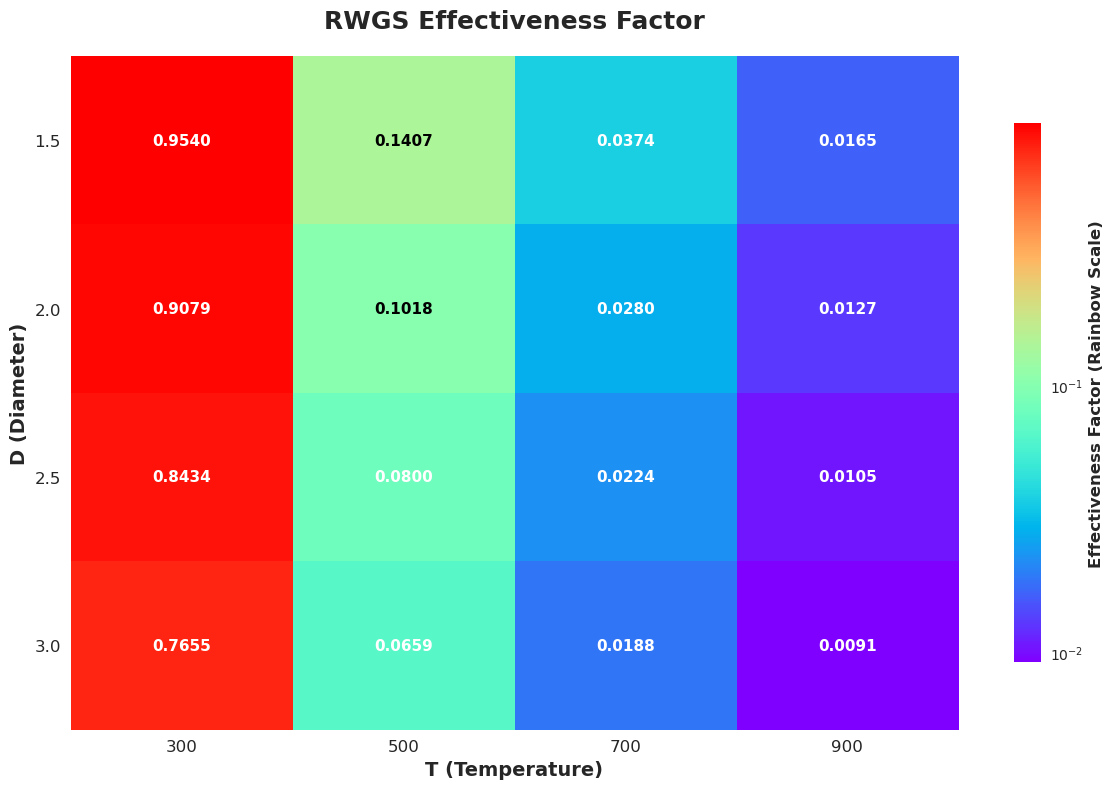


데이터 요약:
최대 효율성: 0.954045 (T=300, D=1.5)
최소 효율성: 0.009134 (T=900, D=3.0)
평균 효율성: 0.250923
Log10 범위: -2.039 - -0.020

Pivot Table:
T         300       500       700       900
D                                          
1.5  0.954045  0.140700  0.037398  0.016493
2.0  0.907935  0.101838  0.027978  0.012694
2.5  0.843413  0.079967  0.022434  0.010513
3.0  0.765540  0.065886  0.018797  0.009134


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

# 데이터 정의
data = {
    'T': [300, 500, 700, 900, 300, 500, 700, 900, 300, 500, 700, 900, 300, 500, 700, 900],
    'D': [3, 3, 3, 3, 2.5, 2.5, 2.5, 2.5, 2, 2, 2, 2, 1.5, 1.5, 1.5, 1.5],
    'eff': [0.76554, 0.065886, 0.018797, 0.009134, 0.843413, 0.079967, 0.022434, 
            0.010513, 0.907935, 0.101838, 0.027978, 0.012694, 0.954045, 0.1407, 
            0.037398, 0.016493]
}


# DataFrame 생성
df = pd.DataFrame(data)

# pivot table 생성 (heatmap용 2D 배열)
heatmap_data = df.pivot(index='D', columns='T', values='eff')

# Log10 스케일 heatmap 생성
plt.style.use('seaborn-v0_8')  # 최신 버전에서는 'seaborn-v0_8' 사용
fig, ax = plt.subplots(figsize=(12, 8))

# 데이터 범위 확인
vmin = df['eff'].min()
vmax = df['eff'].max()
print(f"데이터 범위: {vmin:.6f} - {vmax:.6f}")

# Log10 스케일로 heatmap 생성
# seaborn은 LogNorm을 직접 지원하지 않으므로 matplotlib의 imshow를 사용
im = ax.imshow(heatmap_data.values, 
               cmap='rainbow',  # 무지개색 (보라색 -> 파란색 -> 초록색 -> 노란색 -> 빨간색)
               norm=LogNorm(vmin=vmin, vmax=vmax),
               aspect='auto')

# 모든 격자선과 틱 제거
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_yticks(range(len(heatmap_data.index)))
ax.tick_params(length=0)  # 틱 마크 길이를 0으로 설정
ax.grid(False)  # 격자선 완전 제거

# 각 셀에 값 주석 추가
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        value = heatmap_data.iloc[i, j]
        # 무지개색에 따라 텍스트 색상 설정
        if value > 0.5:  # 매우 높은 값 (빨간색)
            text_color = 'white'
        elif value > 0.1:  # 높은 값 (노란색/주황색)
            text_color = 'black'
        elif value > 0.02:  # 중간값 (초록색)
            text_color = 'white'
        else:  # 낮은 값 (파란색/보라색)
            text_color = 'white'
        
        ax.text(j, i, f'{value:.4f}', 
               ha='center', va='center', 
               fontsize=11, fontweight='bold', 
               color=text_color)

# 축 라벨 설정 (격자선 없이)
ax.set_xticklabels(heatmap_data.columns, fontsize=12)
ax.set_yticklabels(heatmap_data.index, fontsize=12)
# 모든 spine(테두리선)도 제거하여 깔끔하게
for spine in ax.spines.values():
    spine.set_visible(False)

# 컬러바 추가 (로그 스케일)
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Effectiveness Factor (Rainbow Scale)', fontsize=12, fontweight='bold')

plt.title('RWGS Effectiveness Factor', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('T (Temperature)', fontsize=14, fontweight='bold')
plt.ylabel('D (Diameter)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 데이터 요약 출력
print("\n데이터 요약:")
print(f"최대 효율성: {df['eff'].max():.6f} (T={df.loc[df['eff'].idxmax(), 'T']}, D={df.loc[df['eff'].idxmax(), 'D']})")
print(f"최소 효율성: {df['eff'].min():.6f} (T={df.loc[df['eff'].idxmin(), 'T']}, D={df.loc[df['eff'].idxmin(), 'D']})")
print(f"평균 효율성: {df['eff'].mean():.6f}")
print(f"Log10 범위: {np.log10(df['eff'].min()):.3f} - {np.log10(df['eff'].max()):.3f}")
print("\nPivot Table:")
print(heatmap_data)